## Name:

W.K.M Mithsara

## Problem:

The data file “video_data.csv” contains the following details of YouTube videos:
- No of likes
- No of dislikes
- No of subscribers
- No of views

It is needed to design machine learning models to predict the no of views given the no of likes, no of dislikes and no of subscribers.

## Tasks:

### 01. [05 marks] Import the required Python libraries to the notebook.

In [0]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.metrics import r2_score
from keras.models import Sequential

### 02.	[05 marks] Read the given data file (video_data.csv) into a Pandas data frame (name it as ‘df’).

In [0]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving video_data.csv to video_data.csv
User uploaded file "video_data.csv" with length 80873 bytes


In [0]:
uploaded

{u'video_data.csv': 'Likes,Dislikes,Subscribers,Views\r\n104460,3365,7300000,1988888\r\n103203,3570,3300000,2617005\r\n22485,612,1800000,932230\r\n23077,1337,465000,1165800\r\n12315,522,11000000,551165\r\n138716,4417,11000000,2046842\r\n10505,496,1600000,579260\r\n48917,1633,4100000,3486815\r\n56590,1004,3000000,2122981\r\n3531,340,157000,292233\r\n9842,253,3100000,435935\r\n10919,413,4000000,422889\r\n316492,7384,19000000,5247188\r\n37102,680,1800000,1117635\r\n33876,785,6300000,1211786\r\n16021,4595,461000,8125406\r\n42473,13161,391000,6852292\r\n180665,12626,159000,16241700\r\n12086,178,2900000,449512\r\n14913,962,34000,1598024\r\n59184,2214,35000,9701104\r\n17374,924,21000,2462447\r\n66196,4706,459000,16022201\r\n17507,337,570000,1360639\r\n26379,2915,10000000,9452147\r\n26853,10735,324000,28040587\r\n89628,5481,1600000,8376846\r\n17374,924,21000,2462447\r\n101468,5726,13000000,5153706\r\n14393,2200,13000000,1580111\r\n44160,2312,3400000,3749755\r\n84551,5561,6600000,3640895\r\n249

In [0]:
df = pd.read_csv(io.StringIO(uploaded['video_data.csv'].decode('utf-8')))



### 03.	[05 marks] Display the first five data points of the file using the “head()” function.

In [0]:
df.head()

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


### 04.	[05 marks] Obtain the descriptive statistics of no of likes, no of dislikes, no of subscribers and no of views.

In [0]:
df.describe()

,Likes,Dislikes,Subscribers,Views
count,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03
mean,1.298265e+05,1.177348e+04,2.486401e+06,2.110672e+07
std,5.845796e+05,1.857651e+05,5.676479e+06,1.143878e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,5.850000e+02,2.800000e+01,4.600000e+04,3.831525e+04
50%,5.535000e+03,2.205000e+02,3.910000e+05,4.493690e+05
75%,4.092750e+04,2.059000e+03,1.800000e+06,4.022392e+06
max,1.024205e+07,9.653039e+06,7.100000e+07,2.668027e+09


### 05.	[05 marks] Draw three (03) separate scatter plots that show the no of views against the no of likes, no of dislikes and no of subscribers.

Codes (Plot 1 -  No of views Vs. No of likes)

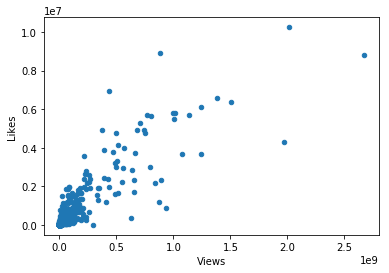

In [0]:
df.plot(kind='scatter',x='Views',y='Likes') # scatter plot

Codes (Plot 2 - No of views Vs. No of dislikes)

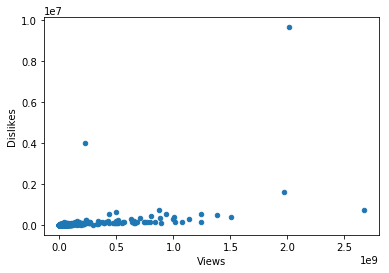

In [0]:
df.plot(kind='scatter',x='Views',y='Dislikes') # scatter plot


Codes (Plot 3 -  No of views Vs. No of subscribers)

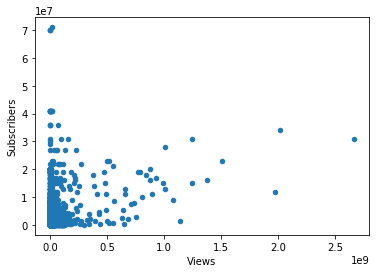

In [0]:
df.plot(kind='scatter',x='Views',y='Subscribers') # scatter plot


### 06.	[05 marks] Split the dataset into two datasets for the training and testing. Use 80% for training and the remaining for the testing.

In [0]:
dataset = df.values

#print dataset

X = dataset[:,0:3].astype('float32')
y = dataset[:,3]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print "Size(X_train) = ", X_train.shape
print "Size(X_test) = ", X_test.shape
print "Size(y_train) = ", y_train.shape
print "Size(y_test) = ", y_test.shape




Size(X_train) =  (2691, 3)
Size(X_test) =  (673, 3)
Size(y_train) =  (2691,)
Size(y_test) =  (673,)


### 07.	[05 marks] Scale X data (no of likes, no of dislikes and no of subscribers) of the training dataset to mean 0 and standard deviation 1. Apply the same transformation to X data of the testing dataset.

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

#print X_train_scaled
#print X_test_scaled

### 08.	[05 marks] Design a linear regression model (name it as “model_reg”) using the training dataset. Use “Keras” Python library to design this model. Print a summary of the model that shows Layer, Output Shape, Number of parameters, etc.

<b><u>Note:</u></b> Add “\_reg” suffix to each variable you define for the regression model as in “model\_reg” here after.

In [0]:
model_reg = Sequential()
INPUT_DIM_REG=3
model_reg.add(Dense(1, input_dim=INPUT_DIM_REG, activation='linear'))
model_reg.summary()

W0911 06:33:30.947849 139991282390912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 06:33:30.991241 139991282390912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 06:33:30.998652 139991282390912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 09.	[05 marks] Compile the model. Use “Adam” optimizer (instead of SGD) with the learning rate 10,000 and loss as mean squared error.

In [0]:
OPTIMIZER = Adam(lr=10000)
model_reg.compile(optimizer=OPTIMIZER, loss='mean_squared_error', metrics=['accuracy'])

W0911 06:33:31.049484 139991282390912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### 10.	[05 marks] Fit the model using the training dataset. Use batch size as 32, no of epochs as 1000 and verbose as 1.

In [0]:
model_history =model_reg.fit(X_train, y_train, batch_size=32, epochs=1000,verbose=1 )

W0911 06:33:31.200009 139991282390912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0911 06:33:31.245249 139991282390912 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/1000
2691/2691 [==============================] - 1s 225us/step - loss: 1671736172957044310016.0000 - acc: 0.0000e+00
Epoch 2/1000
2691/2691 [==============================] - 0s 30us/step - loss: 6548754195358372864.0000 - acc: 0.0000e+00
Epoch 3/1000
2691/2691 [==============================] - 0s 33us/step - loss: 508778113621509056.0000 - acc: 0.0000e+00
Epoch 4/1000
2691/2691 [==============================] - 0s 28us/step - loss: 633285622083361280.0000 - acc: 0.0000e+00
Epoch 5/1000
2691/2691 [==============================] - 0s 31us/step - loss: 1379405591978006784.0000 - acc: 0.0000e+00
Epoch 6/1000
2691/2691 [==============================] - 0s 28us/step - loss: 262950240315102528.0000 - acc: 0.0000e+00
Epoch 7/1000
2691/2691 [==============================] - 0s 27us/step - loss: 146736631820286080.0000 - acc: 0.0000e+00
Epoch 8/1000
2691/2691 [==============================] - 0s 31us/step - loss: 49526199436415912.0000 - acc: 0.0000e+00
Epoch 9/1000
2691/2691 [==

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125779). Check your callbacks.
  % delta_t_median)


2691/2691 [==============================] - 0s 29us/step - loss: 877762953546439196672.0000 - acc: 0.0000e+00
Epoch 34/1000
2691/2691 [==============================] - 0s 29us/step - loss: 4064134455181293649920.0000 - acc: 0.0000e+00
Epoch 35/1000
2691/2691 [==============================] - 0s 29us/step - loss: 270786660152336351232.0000 - acc: 0.0000e+00
Epoch 36/1000
2691/2691 [==============================] - 0s 27us/step - loss: 2009333506535805696.0000 - acc: 0.0000e+00
Epoch 37/1000
2691/2691 [==============================] - 0s 35us/step - loss: 9246910381127825408.0000 - acc: 0.0000e+00
Epoch 38/1000
2691/2691 [==============================] - 0s 28us/step - loss: 2514165490518846464.0000 - acc: 0.0000e+00
Epoch 39/1000
2691/2691 [==============================] - 0s 28us/step - loss: 254072797698278176.0000 - acc: 0.0000e+00
Epoch 40/1000
2691/2691 [==============================] - 0s 29us/step - loss: 25052567754695420.0000 - acc: 0.0000e+00
Epoch 41/1000
2691/2691 [=

### 11.	[03 marks] Plot the loss of the training process against the epochs.

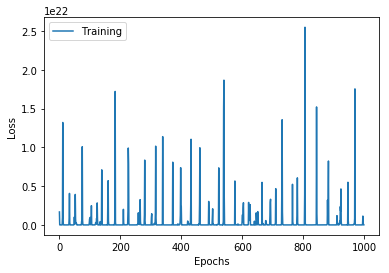

In [0]:

%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])


plot_history(model_history)

### 12.	[03 marks] Find the predicted no of views for the training and testing datasets.

In [0]:
X_train_predictions = model_reg.predict(X_train)
print X_train_predictions

X_test_predictions = model_reg.predict(X_test)
print X_test_predictions

[[-2.2207562e+07]
 [-1.8983164e+06]
 [-9.2769552e+07]
 ...
 [ 2.1767300e+06]
 [ 2.1046970e+06]
 [-3.4861360e+08]]
[[-1.05327376e+08]
 [-2.32604176e+08]
 [-4.71013360e+07]
 [ 3.32248736e+08]
 [-1.42842560e+08]
 [-1.49443520e+07]
 [-2.17819760e+07]
 [-5.53266480e+07]
 [ 2.06050800e+06]
 [-4.87138360e+07]
 [-6.99886272e+08]
 [-1.42583616e+09]
 [-1.03204058e+09]
 [-1.73592864e+08]
 [-1.16700664e+08]
 [-7.23994560e+08]
 [ 5.53232640e+08]
 [-5.55956120e+07]
 [-2.77523168e+08]
 [ 3.66324625e+05]
 [-3.92652520e+07]
 [-3.46517440e+07]
 [-7.58362176e+08]
 [ 7.94497550e+06]
 [ 1.94246688e+06]
 [-1.23216480e+07]
 [-8.20194850e+06]
 [-6.09613400e+06]
 [-3.67974200e+06]
 [-4.71191456e+08]
 [ 2.01803750e+04]
 [-6.70767800e+07]
 [-1.90751696e+08]
 [ 2.78790650e+06]
 [ 1.90747712e+06]
 [ 3.76075050e+06]
 [-4.19359136e+08]
 [-1.85049264e+08]
 [-3.80270080e+08]
 [-5.83723875e+05]
 [-7.98549888e+08]
 [-2.30106650e+09]
 [-8.58931200e+08]
 [ 4.22669216e+08]
 [-6.52633664e+08]
 [ 1.46258140e+07]
 [-5.7781084

### 	13. [05 marks] Draw two (02) scatter plots that show the predicted no of views against the original no of views for the training and testing datasets. Note that if your predicted values are closer to the original values, points of the plot scatter around the line $y=x$.

Codes (Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

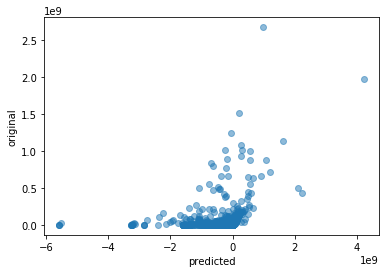

In [0]:

# Plot

plt.scatter(X_train_predictions, y_train, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("original")
plt.show()

Codes (Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset)

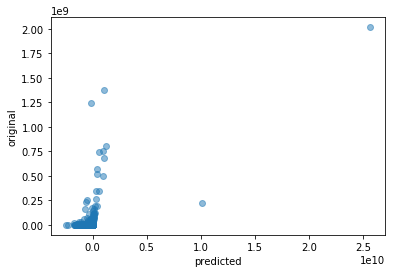

In [0]:
# Plot

plt.scatter(X_test_predictions, y_test, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("original")
plt.show()

### 	14. [05 marks] Compute the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets. Note that if your model is perfectly fitted, $R^2$ values should be close to 1.

In [0]:
print "Testing Dataset:"
print r2_score(y_test, X_test_predictions)

Testing Dataset:
-67.21525178637462


In [0]:
print "Training Dataset:"
print r2_score(y_train, X_train_predictions)

Training Dataset:
-18.587268911338892


### 15.	[05 marks] Design a neural network (name it as “model_dnn”) with 4 hidden layers, each layer contains 13 neurons. Use the “relu” activation function in the input and hidden layers. Print a summary of the model that shows Layer, Output Shape, Number of parameters, etc. 

<b><u>Note:</u></b> Add “\_dnn” suffix to each variable you define for the deep neural network model as in ‘model\_dnn’ here after.

In [0]:
model_dnn = Sequential()
model_dnn.add(Dense(13, input_dim=3, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(1, kernel_initializer='normal'))
# Compile model
model_dnn.compile(loss='mean_squared_error', optimizer='adam')

model_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                52        
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 14        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


### 16.	[05 marks] Compile the model. Use “Adam” optimizer (instead of SGD) with the learning rate 0.003 and loss as mean squared error.

In [0]:
OPTIMIZER = Adam(lr=0.003)
model_dnn.compile(optimizer=OPTIMIZER, loss='mean_squared_error', metrics=['accuracy'])

### 17.	[05 marks] Fit the model using the training dataset. Use batch size as 32, no of epochs as 1000 and verbose as 1.

In [0]:
model_history_dnn =model_dnn.fit(X_train, y_train, batch_size=32, epochs=1000,verbose=1 )

Epoch 1/1000
2691/2691 [==============================] - 0s 163us/step - loss: 12437406522193332.0000 - acc: 0.0000e+00
Epoch 2/1000
2691/2691 [==============================] - 0s 43us/step - loss: 11026726003736794.0000 - acc: 0.0000e+00
Epoch 3/1000
2691/2691 [==============================] - 0s 43us/step - loss: 9923250599299094.0000 - acc: 0.0000e+00
Epoch 4/1000
2691/2691 [==============================] - 0s 42us/step - loss: 7503862995148833.0000 - acc: 0.0000e+00
Epoch 5/1000
2691/2691 [==============================] - 0s 40us/step - loss: 2915444251583264.5000 - acc: 0.0000e+00
Epoch 6/1000
2691/2691 [==============================] - 0s 41us/step - loss: 3542881271342112.5000 - acc: 0.0000e+00
Epoch 7/1000
2691/2691 [==============================] - 0s 42us/step - loss: 2871826360122424.0000 - acc: 0.0000e+00
Epoch 8/1000
2691/2691 [==============================] - 0s 39us/step - loss: 3267706040612769.0000 - acc: 0.0000e+00
Epoch 9/1000
2691/2691 [=====================

### 18.	[02 marks] Plot the loss of the training process against the epochs.

In [0]:
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])


plot_history(model_history_dnn)

### 19.	[02 marks] Find the predicted no of views for the training and testing datasets.

In [0]:
X_train_predictions_dnn = model_dnn.predict(X_train)
print X_train_predictions_dnn

X_test_predictions_dnn = model_dnn.predict(X_test)
print X_test_predictions_dnn

### 20. [05 marks] Draw two (02) scatter plots that show the predicted no of views against the original no of views for the training and testing datasets. Note that if your predicted values are closer to the original values, points of the plot scatter around the line $y=x$.

Codes (Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

In [0]:
# Plot

plt.scatter(X_train_predictions_dnn, y_train, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("original")
plt.show()

Codes (Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset)

In [0]:
# Plot

plt.scatter(X_test_predictions_dnn, y_test, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("original")
plt.show()

### 21. [05 marks] Compute the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets. Note that if your model is perfectly fitted, $R^2$ values should be close to 1.

In [0]:
print "Training Dataset:"
print r2_score(y_train, X_train_predictions_dnn)

print "Testing Dataset:"
print r2_score(y_test, X_test_predictions_dnn)

### 22.	[05 marks] Discuss the results obtained from two models and explain which model is more appropriate for the problem.


When we train model using linear regression model,the scatter plot loss of the training process against the epochs shows higher losses than neural network model.

In liner regression model,points in scatter plot that show the predicted no of views against the original no of views for the training and testing datasets not around the line  y=x.So predicted values are not closer to the original values. 

In Neural network model,points in scatter plot that show the predicted no of views against the original no of views for the training and testing datasets,are around the line  y=x.So predicted values are closer to the original values.

In linear regression model, R2 is -1575262.418283122 for testing dataset. But In neural network model R2 is 0.8100379216926125.So linear regression model is more fit than neural network model.So We can say linear regression model is more appropriate for the problem.


**But in case here, In linear regression model we used learning rate as 10000.Large learning rates result in unstable training and tiny rates result in a failure to train.If learning rate in linear regression model is small(0.1) learning rate in neural network model is 0.003 then linear regression model is more appropriate than the neural network model.**







<center><h2>---END---</h2></center>